In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("dataset/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = data.drop(["label"],axis = 1)
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train = data[:30000]
test = data[30000:]
train = np.array(train)/255
test = np.array(test)/255

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(300))
model.add(Activation("relu"))
model.add(Dense(150))
model.add(Activation("relu"))
model.add(Dense(300))
model.add(Activation("relu"))
model.add(Dense(784))
model.add(Activation("sigmoid"))
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
model.fit(train, train, batch_size=32, epochs=5, validation_split=0.25)

Train on 22500 samples, validate on 7500 samples
Epoch 1/5
22500/22500 [==============================] - 14s 624us/sample - loss: 0.1419 - acc: 0.8059 - val_loss: 0.0987 - val_acc: 0.8126
Epoch 2/5
22500/22500 [==============================] - 13s 600us/sample - loss: 0.0892 - acc: 0.8141 - val_loss: 0.0856 - val_acc: 0.8141
Epoch 3/5
22500/22500 [==============================] - 13s 568us/sample - loss: 0.0818 - acc: 0.8146 - val_loss: 0.0819 - val_acc: 0.8143
Epoch 4/5
22500/22500 [==============================] - 13s 572us/sample - loss: 0.0782 - acc: 0.8149 - val_loss: 0.0778 - val_acc: 0.8145
Epoch 5/5
22500/22500 [==============================] - 13s 599us/sample - loss: 0.0759 - acc: 0.8150 - val_loss: 0.0769 - val_acc: 0.8146


In [16]:
val_loss, val_accuracy = model.evaluate(test, test)

12000/12000 [==============================] - 2s 152us/sample - loss: 0.0764 - acc: 0.8153


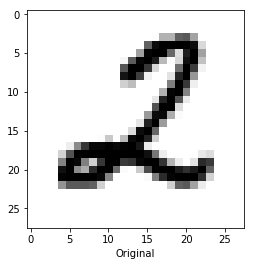

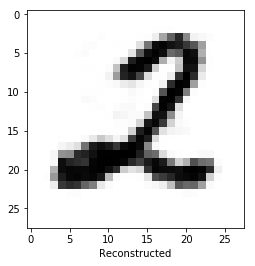

In [9]:
tmp = test[10]
tmp.shape = (28,28)
plt.imshow(255-tmp,cmap='gray')
plt.xlabel('Original')
plt.show()

prediction = model.predict([[tmp]])
prediction.shape = (28,28)
plt.imshow(255-prediction,cmap='gray')
plt.xlabel('Reconstructed')
plt.show()